This assignment is based on Support Vector Machines.

**Instructions for this assignment:**


1.   Certain sections of code are missing are have being replaced by 'pass'. You need to replace 'pass' with your block of code by following the instructions provided.  




#Linear SVM

In [1]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # A module of scikit-learn library used for implementing SVM. SVC stands for Support Vector Classifier

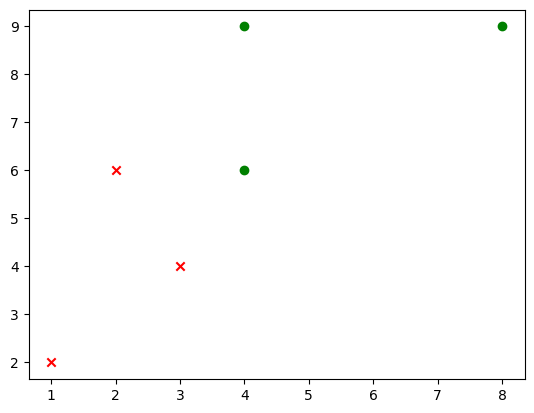

In [2]:
#Preparation of dataset

x = np.array([[1,2],[4,6],[8,9], [3,4], [2,6], [4,9]])
y = np.array([0, 1, 1, 0, 0, 1])
for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

**Task 1**: Read about kernel argument of SVC and replace kernal_used by the kernel required for linear SVM.

In [3]:
kernel_used = 'linear'
Classifier = SVC(gamma = 'auto', kernel = kernel_used)
Classifier.fit(x, y)

SVC(gamma='auto', kernel='linear')

**Task 1:** Find the equation of boundary by using the parameters

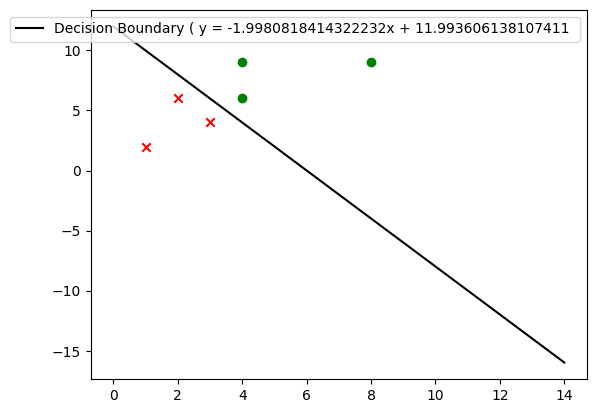

In [4]:
#####
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0]/weight_matrix[1]
bias = - Classifier.intercept_[0]/weight_matrix[1]
val = np.linspace(0, 14)
boundary = slope * val + bias
#####

plt.plot(val, boundary, 'k', label = f"Decision Boundary ( y = {slope}x + {bias} ") #write the equation for the decision boundary using the variables used above

for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

plt.legend()
plt.show()

#Non- Linear SVM

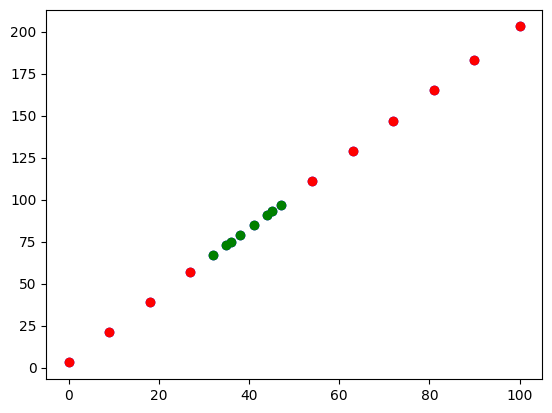

In [5]:
#Preparation of dataset
x1 = np.linspace(0, 100, 12, dtype=int)
x1 = np.append(x1, np.linspace(30, 50, 8, dtype=int))
x1 = np.sort(x1)
x1 = np.delete(x1, np.where(x1 == 30))
x1 = np.delete(x1, np.where(x1 == 50))
n = x1.size
x2 = 2*x1+3
coordinates = np.column_stack((x1, x2))
label = np.zeros(n, dtype=int)
plt.scatter(x1, x2, color="blue")
for i in range(n):
  if(30<x1[i]<50):
    label[i]=1
    plt.scatter(x1[i],x2[i],color="green")
  else:
    label[i]=0
    plt.scatter(x1[i],x2[i],color="red")

**Answer the following questions** \\
Q: Is the above dataset linearly separable?
Ans: No

Q. How many classes are there in the above dataset?
Ans:2


Q. How many features are used in the above dataset?
Ans : 2

Q. What will be dimension of hyperplane used for this dataset?  
Ans: DIM = 3

#Splitting the Dataset
**Task**: Split the given dataset into training and testing data. The code snippet to illustrate the data has been given.

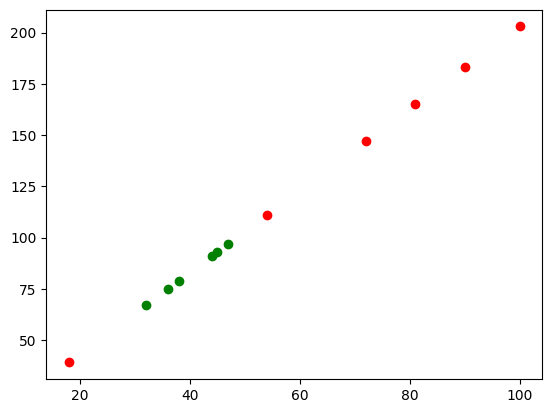

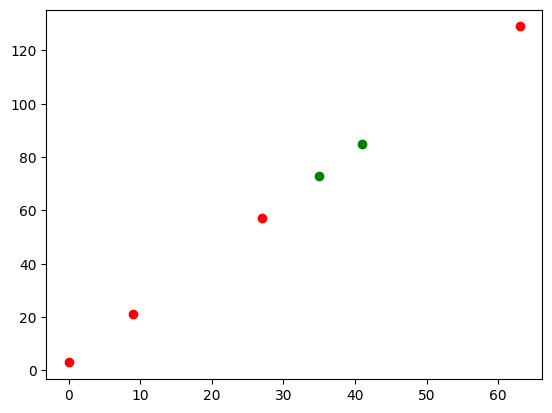

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(coordinates,label,test_size=0.3,random_state=42)

for i in range (X_train.T[0].size):
  if(Y_train[i]==1):
    plt.scatter(X_train[i][0], X_train[i][1], color="green")
  else:
    plt.scatter(X_train[i][0], X_train[i][1], color="red")
plt.show()

for i in range (X_test.T[0].size):
  if(Y_test[i]==1):
    plt.scatter(X_test[i][0], X_test[i][1], color="green")
  else:
    plt.scatter(X_test[i][0], X_test[i][1], color="red")
plt.show()

# Non Linear Classifier
**Task 1**: Generate a classifier for the above dataset using suitable kernel function. Also, provide an explanation for your choice of kernel. \\
**Task 2**: Explain and illustrate, using plots, how the kernel used, enables the data to be classified using a SVC.

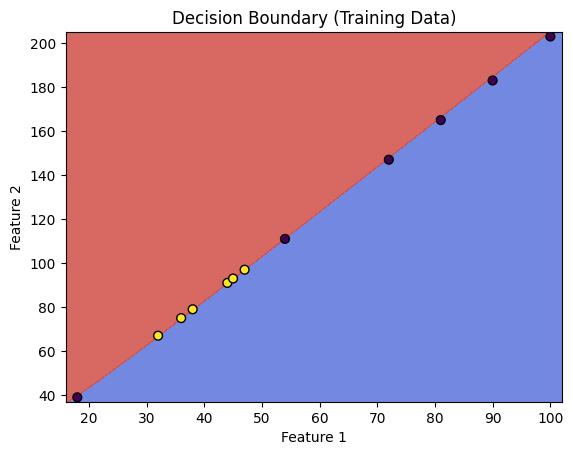

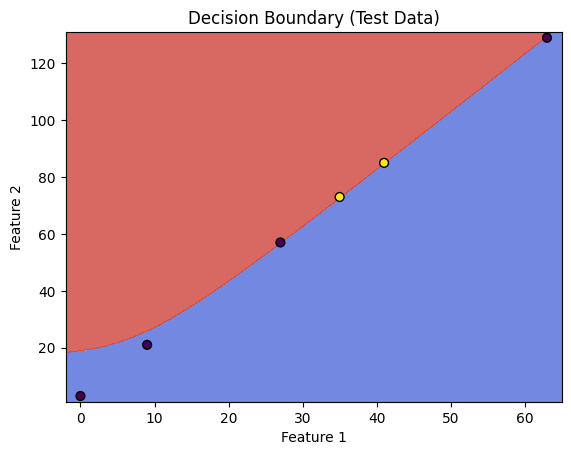

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
Classifier = SVC(gamma= 2,kernel= 'poly' )
'''I have used polynomial kernel here for non linear classification of the data . the data we have been provided 
cannot be linearly classified so the data had to be exptropolated to a higher dimension so that it can be linearly 
classified''' 
Classifier.fit(X_train,Y_train)
def plot_decision_boundary(X, y, classifier, title):
    # This is the step size in the mesh
    h = 0.02  
    x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    v = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(v)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()
plot_decision_boundary(X_train, Y_train, Classifier, 'Decision Boundary (Training Data)')
plot_decision_boundary(X_test, Y_test, Classifier, 'Decision Boundary (Test Data)')